In [2]:
# 데이터 처리, 선형대수와 행렬 등 연산 모듈
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import re
import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import missingno as msno
from typing import *
import pandas_datareader as web
import pandas_datareader.data as web
import pandas_datareader as pdr

# 통계적 가설검정 모듈
from scipy.stats import *
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson

# 코랩에 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

# 데이터 시각화 모듈
import seaborn as sns
import matplotlib.pyplot as plt

# 증권 데이터 웹스크래핑 모듈
# !pip install --upgrade pandas
# !pip install --upgrade pandas-datareader
!pip install pykrx
!pip install finance-datareader
!pip install yfinance
!pip install pybind11
  # 의존성 모듈로 함께 설치할 것(https://riskfolio-lib.readthedocs.io/en/latest/install.html)
!pip install riskfolio-lib

import requests as rq
from bs4 import BeautifulSoup
from pykrx import stock
import pandas_datareader.famafrench as ff
import FinanceDataReader as fdr
import pandas_datareader as web
from pandas_datareader.famafrench import get_available_datasets
import yfinance as yf
yf.pdr_override()
import riskfolio as rp

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.5/125.5 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 12.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.4/222.4 KB 5.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 50.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 15.1 MB/s eta 0:00:00
  Created wheel for riskfolio-lib: filename=Riskfolio_Lib-4.0.3-cp38-cp38-linux_x86_64.whl size=178301 sha256=d544a7258878a5b685231b65d9e7e95e2a11d23db69803371dc6415bc48a6ed8
  Stored in directory: /root/.cache/pip/wheels/86/05/4c/6a409ccea0f00dff448de87740642853c31a65168aec0968de
Successfully built riskfolio-lib


In [3]:
# 한글 폰트 사용을 위해서 세팅

from matplotlib import font_manager, rc
font_path = r"/content/drive/MyDrive/FindAlpha_RiskyAsset1/archive/korean.ttf"
  # 오류가 발생한다면, 경로를 "/content/drive/FindAlpha_RiskyAsset1/archive/korean.ttf"로 설정
  # 혹은 로컬 폰트 경로인 "C:\\WINDOWS\FONTS\malgun.ttf"로 설정
font = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font)

출처
* [김동영 외 1인, 삼성증권, Fama-French 3 Factor Model - 전후편, 2018](https://www.smallake.kr/wp-content/uploads/2018/08/Back_to_Basic_Fama-French_3_%ed%8c%a9%ed%84%b0_%eb%aa%a8%eb%8d%b8_-_%ed%9b%84%ed%8e%b820180703171930.pdf)
* [FnGuide, Factor 포트폴리오 구성 방법](https://www.fnguide.com/download/Factor_Model_Methodology.pdf)
* [Kenneth R. French, U.S. Research Returns Data](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)
* [Steven Downey, How to Build a Multi-Factor Equity Portfolio in Python, Medium article](https://medium.com/swlh/how-to-build-a-multi-factor-equity-portfolio-in-python-4560fab3df7b)
* [파이썬으로 배우는 포트폴리오](https://thebook.io/080227/ch06/05/02-02/)

### 자산배분을 최적화하는 요인모델, Fama-French Mutiple factor model
(자본자산가격결정모형 CAPM과의 차이를 중심으로 이해)

* R_m - R_f : 시장초과수익률(R_f의 예 : 매월 월초 기준의 CD 91일물 금리)
* HML(High Minus Low) PBR이 낮은 포트폴리오 Long하고, PBR이 높은 포트폴리오는 Short, BE / ME 팩터

  대형가치주와 소형가치주의 수익률 평균에서 대형성장주와 소형성장주의 수익률 평균을 뺀 값

* UMD(Up Minus Down, Momentum) 모멘텀 : 금일 종가 / 10일 전 종가 * 100, 모멘텀 팩터

  연간 수익률 상위 종목군 수익률에서 연간 수익률 하위 종목군 수익률을 뺀 값
* SMB(Small Minus Big) 소형주 Long, 대형주 Short, 규모 팩터

  세 개의 소형주 포트폴리오 수익률의 기하평균에서 세 개의 대형주 포트폴리오 수익률의 기하평균을 뺀 값
  
* RMW(Robust Minus Weak) : 영업활동을 통해 얻는 순수익
* CMA(Conservative Minus Aggressive) : 자산 대비 투자비용

* 원칙적으로 베타(회귀계수)는 **최소 60종목 이상 일간 또는 주간이 아닌 월간 수익률 데이터**를 활용하여 산출하여야 한다.

$$ R(t) - R_f(t) = a + B_1⋅[R_M(t) - R_f(t)] + B_2⋅SMB(T) + B_3⋅HML(t) + B_4⋅UMD(t) + ϵ(t) \\ (ϵ = residual) $$ 

결국 시계열 다중선형회귀분석

0. 종속변수(target)는 수익률, 독립변수(feature)는 시장초과수익률, 시가총액(규모), 모멘텀, 장부가치 대 시장가치 비율

  수익률 데이터를 특성변수의 확률분포로부터 얻은 실현값으로 예측하는 관점(X의 분포로 y를 예측)
1. 최소 60종목 이상, 월간 종가, 시가총액, BM(PBR 역수) 등의 데이터 로드
2. 포트폴리오 최적화 시 공분산, 상관계수 산출을 위한 수익률은 자연로그 변환하는 것이 일반적
3. FF 3요인, 5요인 등 다요인 모형 구현 
4. 전제요건 가설검정 -> 다중선형회귀분석 -> 표준화된 회귀계수에 따른 변수중요도 확인 -> 비선형 변환으로 과소적합 완화 -> train : validation : test data로 과대적합 관측 -> 벌점항 추가하여 람다, 비용과 같은 하이퍼파라미터 튜닝
5. APT와 비교
6. 팩터 설정을 위한 투자설명서 등의 레퍼런스 참고

SY's Q.

* 통계적 추정치의 신뢰성은 어떻게 측정할 수 있을까
* 주가수익률에 어떻게 배당금을 반영할 수 있을까
* 투자자산 포트폴리오의 수익률을 이끄는 요인은 무엇일까 그리고 투자자가 지출하는 비용이 정말 필요한 것일까
* 그렇다면 수수료, 거래비용, 세금은 어떻게 반영할 수 있을까
* 주식시장의 팩터와 채권시장의 팩터를 어떻게 결합하여 독립변수의 종속변수에 대한 설명력을 확보할 수 있을까
* 모델을 만들고 실행하고 분석하는 일보다 요인 모델을 위한 기초 시계열 데이터를 만드는 일이 더 힘든 작업일 것이다

In [186]:
class FamaFrenchModel():
  
  def __init__(self, html: str, from_date = None, to_date = None, 
               data_name = None, multiFactorModeling_portfolio_data = None):
    self.html = html
    self.from_date = from_date
    self.to_date = to_date
      # "http://kind.krx.co.kr/corpgeneral/corpList.do?method=download"
    self.data_name = data_name
    self.multiFactorModeling_portfolio_data = multiFactorModeling_portfolio_data


  def ImportNameList(self, filtering_word1: str, filtering_word2: str):

  # 5요인 (R_market - R_free, HML, SMB, RMW, CMA) 데이터 셋 이름을 리스트에 담기
    datasets = ff.get_available_datasets( )
    data_name = [data for data in datasets if filtering_word1 in data and filtering_word2 in data]
    print(data_name)
    self.data_name = data_name
      # filtering_word1, 2(키워드)를 입력하여 프렌치 교수의 데이터 셋 명을 담은 리스트를 생성함
      # [input] {30, Industry} 
      # [output] ['30_Industry_Portfolios', '30_Industry_Portfolios_Wout_Div', '30_Industry_Portfolios_daily']
    

  def getStockCode(self, stock_list: List):

  # 주식종목코드 데이터프레임 stock_code 생성
    stock_code = pd.read_html(self.html, header = 0)[0]
    stock_code = stock_code[["종목코드", "회사명"]]
    stock_code["종목코드"] = stock_code["종목코드"].apply(
        lambda x: "0"*(6 - len(str(x))) + str(x))
      # 주식종목코드는 int 타입(연속형)으로 6자리에 맞추기 위한 0 추가하는 익명함수
    
    for stocks in stock_list:
      globals()["index_{}".format(stocks)] = stock_code[stock_code["회사명"] == stocks].index[0]
        # 회사명이 self.stock인 주식종목코드가 있는 행을 index_stock에 저장함

      globals()["code_{}".format(stocks)] = stock_code.iloc[globals()["index_{}".format(stocks)], 0]
        # 입력받은 self.stock의 주식종목코드를 code_stock에 저장함
      print(stocks, globals()["code_{}".format(stocks)])

    self.stock_list = stock_list


  def ImportDataFrame(self, n: int, ticker_name: str, from_date: str, to_date: str):
  
  # 월별 5요인 데이터 불러오기 (Feature Variable, X vector)

    # self.from_date = datetime.strptime(start, "%Y, %m, %d")
    # self.to_date = datetime.strptime(end, "%Y, %m, %d")
      # [ValueError] time data '2021,01,01' does not match format '%Y, %m, %d'

    self.from_date = from_date
    self.to_date = to_date

    factor_data = web.DataReader(self.data_name[n],
                                 "famafrench",
                                 start = self.from_date,
                                 end = self.to_date)
    print(factor_data["DESCR"])
      # portfolio_name 리스트에서 n번째 원소를 인덱싱하여 from_date부터 to_date까지의 포트폴리오 데이터 셋을 딕셔너리 타입으로 내려받음
    factor_data[0].index = factor_data[0].index.strftime("%Y-%m")
      # 인덱스의 종류를 YYYY-MM으로 날짜 형식 변환함
    factor_data = factor_data[0]
      # portfolio_data의 월별 5요인 데이터를 self.portfolio_data로 캡슐화함
      # 팩터를 구성하기 위해 한 국가의 주식을 2개의 시가총액과 3개의 B/M, 영업이익률(OP) 및 투자(INV) 그룹으로 분류

  # [Error] 자산포트폴리오 또는 개별증권의 월간 수익률 (Target Variable y)

    # for ticker in self.stock_list:
    stocks_data = stock.get_etf_ohlcv_by_date(fromdate = self.from_date, todate = self.to_date, ticker = ticker_name, freq = "m")
    stocks_data.index = stocks_data.index.strftime("%Y-%m")
    factor_data["expected_return"] = stocks_data["종가"].pct_change().fillna(0)
    # weight = np.ones(shape=(len(stocks_data.columns),)) / len(stocks_data.columns)

    # close = web.get_data_yahoo(ticker, start = self.from_date, end = self.to_date, interval = "m")["Adj Close"]
    # close.index = close.index.strtime("%Y-%m")
    # return_data = np.log(close).pct_change()[ 1: ]
      # yf.actions() : 배당, 분할 -> 수정주가 데이터로 해결할 수 있는 문제 (액면분할, 배당금, 권리행사 등의 영향을 반영)
      # yf.cashflow() / earnings() / balance_sheet()

    # multiFactorModeling_portfolio_data = pd.concat([return_data, factor_data], axis = 1, ignore_index = True)
        
    multiFactorModeling_portfolio_data = factor_data.copy()
    multiFactorModeling_portfolio_data.rename(columns = {"Mkt-RF":"market_excess_return"}, inplace = True)
    multiFactorModeling_portfolio_data["portfolio_excess_return"] = multiFactorModeling_portfolio_data["expected_return"] - multiFactorModeling_portfolio_data["RF"]
    self.multiFactorModeling_portfolio_data = multiFactorModeling_portfolio_data
    return self.multiFactorModeling_portfolio_data


  def preconditional_test(self):

  # 전제조건 1: 정규성 검정(Anderson-Darling Test, Jarque-bera Test) ShapiroWilk Test, KS Test에 비해 덜 엄격한 검정
    for column in self.multiFactorModeling_portfolio_data.select_dtypes(include = ["int64", "float64"]).columns.tolist():
      anderson_result = anderson(self.multiFactorModeling_portfolio_data[column], dist = "norm")
      if anderson_result[0] > anderson_result[1][2]:
        # [0] 검정통계량(statistic)
        # [1] 임계값(유의수준 a, 5% 이상이 되는 자리값, critical_values) 
        # [2] 임계값의 유의확률 p-value
        # [1][2] 정규성 검정통계량이 유의수준 5% 검정통계량보다 클 경우, 정규분포를 따름
        print(f"{column}변수는 정규분포를 따르지 않는다")
      else: 
        print(f"{column}변수는 정규분포를 따른다")
    print("\n")

  # 전제조건 1: 정규성 검정(Jarque-bera Test) 왜도와 첨도를 이용한 검정
    for column in self.multiFactorModeling_portfolio_data.select_dtypes(include = ["int64", "float64"]).columns.tolist():
      jb_result = jarque_bera(self.multiFactorModeling_portfolio_data[column])
      if jb_result[1] < 0.05:
        print(f"{column}변수는 정규분포를 따르지 않는다")
      else: 
        print(f"{column}변수는 정규분포를 따른다")
    print("\n")


  # 전제 조건 2: 등분산성 검정(정규성이 성립하지 않을 경우 Levene Test)
    for column_1 in self.multiFactorModeling_portfolio_data.select_dtypes(include = ["int64", "float64"]).columns.tolist():
      for column_2 in self.multiFactorModeling_portfolio_data.select_dtypes(include = ["int64", "float64"]).columns.tolist():
        if column_1 != column_2:
          levene_result = levene(self.multiFactorModeling_portfolio_data[column_1], self.multiFactorModeling_portfolio_data[column_2])
          
          if levene_result[1] < 0.05:
            print(f"{column_1}변수와 {column_2}변수의 이분산성은 통계적으로 유의하다")
          else:
            print(f"{column_1}변수와 {column_2}변수은 등분산성 조건이 성립한다")
        
        else: # column_1 == column_2:
          pass

  # 전제 조건 3 : 다중공선성(multicollinearity)
  # 독립변수 간 상관관계가 높으면 2가지 문제가 발생함
  # (1) 유의해야 할 회귀계수 추정치가 유의하지 않게 추정됨
  # (2) 회귀계수 추정치 부호가 반대로 유의하게 추정됨
    correlation = self.multiFactorModeling_portfolio_data.drop("portfolio_excess_return", axis = 1).corr()  
      # 데이터프레임의 상관계수 행렬
    mask = np.zeros_like(correlation, dtype = np.bool)
      # 상관분석 히트맵 삼각형 마스크(위 쪽 삼각형에 True, 아래 삼각형에 False)
    mask[np.triu_indices_from( mask )] = True
    sns.heatmap(data = correlation, 
                cmap = "GnBu_r", 
                  # colormap 팔레트
                annot = True, 
                  # 실제값 표시
                fmt = "0.01f",
                  # 소수점 둘째 자리까지 표시
                mask = mask, 
                  # 표시하지 않을 위쪽 삼각형 마스크 부분 지정
                linewidths = 0.5, 
                  # 경계면 실선으로 구분
                vmin = -1,
                vmax = 1
                  # colorbar의 범위 -1 ~ 1로 지정
                )
      # 상관계수 히트맵
    plt.show()

  
  def linearRegression(self, linearRegFormula: object):
  
  # (시계열) 다중선형회귀분석 모형 추정
    FF_5factor_linearRegModel = sm.ols(
        formula = linearRegFormula, data = self.multiFactorModeling_portfolio_data
    ).fit()
    print(FF_5factor_linearRegModel.summary())

  # 전제 조건 4 : 잔차의 정규성 및 독립성 검정
  # 회귀계수(모형식의 파라미터)의 편의가 발생하고 예측의 신뢰성이 낮아지는 오차의 자기상관관계가 없는지 Durbin Watson 검정
    residual_jb_result = jarque_bera(FF_5factor_linearRegModel.resid)
    if residual_jb_result[1] < 0.05:
      print("회귀식의 잔차는 정규분포를 따르지 않는다")
    else: 
      print("회귀식의 잔차는 정규분포를 따른다")
    print("\n")
    sns.distplot(x = FF_5factor_linearRegModel.resid)
    plt.title("Residuals Histogram")

    print(f"회귀식 잔차의 DW-통계량은 {round(durbin_watson(FF_5factor_linearRegModel.resid), 4)}이다")
      # 일반적으로 1.5 ~ 2.5사이 값이면 자기상관관계가 없어 독립이라고 판단함
      # 0에 가까울수록 잔차들은 양의 자기상관을 가짐
      # 2에 가까울수록 자기상관이 없어짐
      # 2보다 크고 4에 가까워질수록 잔차들은 음의 자기상관을 가짐

"""
  # 결정계수 : 선행조건(train : test split and predict test with train model)
    y_test, y_pred = 0, 0
    SST = sum(y_test - y_test.mean())**2
      # 편차의 제곱(Total Sum of Squqres) = 총변동
    SSR = sum(y_pred - y_test.mean())**2
      # 편차와 잔차의 차이 제곱(Regression sum of squares) = 추정회귀식으로 설명가능한 변동
    SSE = sum(FF_5factor_linearRegModel.resid)**2
      # 잔차의 제곱(Error Sum of Squares) = 회귀식으로 설명할 수 없는 변동
    R_squared = (1 - SSE/SST)
    k = len(self.multiFactorModeling_portfolio_data) - 1
    n = FF_5factor_linearRegModel.nobs
    Adjusted_R_squared = 1 - (SSE/(n-k-1)) / (SST/(n-1))
"""

'\n  # 결정계수 : 선행조건(train : test split and predict test with train model)\n    y_test, y_pred = 0, 0\n    SST = sum(y_test - y_test.mean())**2\n      # 편차의 제곱(Total Sum of Squqres) = 총변동\n    SSR = sum(y_pred - y_test.mean())**2\n      # 편차와 잔차의 차이 제곱(Regression sum of squares) = 추정회귀식으로 설명가능한 변동\n    SSE = sum(FF_5factor_linearRegModel.resid)**2\n      # 잔차의 제곱(Error Sum of Squares) = 회귀식으로 설명할 수 없는 변동\n    R_squared = (1 - SSE/SST)\n    k = len(self.multiFactorModeling_portfolio_data) - 1\n    n = FF_5factor_linearRegModel.nobs\n    Adjusted_R_squared = 1 - (SSE/(n-k-1)) / (SST/(n-1))\n'

In [187]:
FF = FamaFrenchModel(html = "http://kind.krx.co.kr/corpgeneral/corpList.do?method=download")

In [188]:
FF.ImportNameList(filtering_word1 = "5", filtering_word2 = "Factor")

['F-F_Research_Data_5_Factors_2x3', 'F-F_Research_Data_5_Factors_2x3_daily', 'Developed_5_Factors', 'Developed_5_Factors_Daily', 'Developed_ex_US_5_Factors', 'Developed_ex_US_5_Factors_Daily', 'Europe_5_Factors', 'Europe_5_Factors_Daily', 'Japan_5_Factors', 'Japan_5_Factors_Daily', 'Asia_Pacific_ex_Japan_5_Factors', 'Asia_Pacific_ex_Japan_5_Factors_Daily', 'North_America_5_Factors', 'North_America_5_Factors_Daily', 'Emerging_5_Factors']


In [189]:
# FF.getStockCode(stock_list = [])

In [190]:
DF = FF.ImportDataFrame(
    n = -1,
    from_date = "20210101", 
    to_date = "20230101",
    ticker_name = "102110"
      # TIGER 200 ETF
)
  # [TypeError] descriptor 'time' for 'datetime.datetime' objects doesn't apply to a 'int' object
  # [ValueError] Length mismatch: Expected axis has 8 elements, new values have 1 elements

Emerging 5 Factors
------------------

This file was created using the 202301 Bloomberg database. Missing data are indicated by -99.99. 

  0 : (25 rows x 6 cols)
  1 : Annual Factors: January-December (2 rows x 6 cols)


In [191]:
DF
  # [NaN Error]

,market_excess_return,SMB,HML,RMW,CMA,RF,expected_return,portfolio_excess_return
Date,,,,,,,,
2021-01,2.11,-0.89,-4.38,2.06,-3.96,0.00,0.000000,0.000000
2021-02,2.06,3.50,4.31,-1.69,1.16,0.00,0.013789,0.013789
2021-03,-0.65,2.18,4.33,0.96,3.55,0.00,0.011916,0.011916
2021-04,2.97,2.05,2.92,-1.32,0.59,0.00,0.006185,0.006185
2021-05,2.42,0.36,2.90,0.29,0.85,0.00,0.011467,0.011467
2021-06,0.61,2.92,0.20,-0.95,0.41,0.00,0.026531,0.026531
2021-07,-5.45,2.78,3.72,1.92,2.00,0.00,-0.032449,-0.032449
2021-08,2.32,-1.69,1.85,0.86,1.94,0.00,-0.011061,-0.011061
2021-09,-3.10,0.61,3.38,-0.27,1.79,0.00,-0.042004,-0.042004


market_excess_return변수는 정규분포를 따른다
SMB변수는 정규분포를 따른다
HML변수는 정규분포를 따르지 않는다
RMW변수는 정규분포를 따른다
CMA변수는 정규분포를 따르지 않는다
RF변수는 정규분포를 따르지 않는다
expected_return변수는 정규분포를 따른다
portfolio_excess_return변수는 정규분포를 따른다


market_excess_return변수는 정규분포를 따른다
SMB변수는 정규분포를 따른다
HML변수는 정규분포를 따른다
RMW변수는 정규분포를 따른다
CMA변수는 정규분포를 따른다
RF변수는 정규분포를 따르지 않는다
expected_return변수는 정규분포를 따른다
portfolio_excess_return변수는 정규분포를 따른다


market_excess_return변수와 SMB변수의 이분산성은 통계적으로 유의하다
market_excess_return변수와 HML변수은 등분산성 조건이 성립한다
market_excess_return변수와 RMW변수의 이분산성은 통계적으로 유의하다
market_excess_return변수와 CMA변수의 이분산성은 통계적으로 유의하다
market_excess_return변수와 RF변수의 이분산성은 통계적으로 유의하다
market_excess_return변수와 expected_return변수은 등분산성 조건이 성립한다
market_excess_return변수와 portfolio_excess_return변수은 등분산성 조건이 성립한다
SMB변수와 market_excess_return변수의 이분산성은 통계적으로 유의하다
SMB변수와 HML변수의 이분산성은 통계적으로 유의하다
SMB변수와 RMW변수은 등분산성 조건이 성립한다
SMB변수와 CMA변수은 등분산성 조건이 성립한다
SMB변수와 RF변수의 이분산성은 통계적으로 유의하다
SMB변수와 expected_return변수은 등분산성 조건이 성립한다
SMB변수와 portfolio_excess_return변수은 등분산성 조건이 성립한다
H

<ipython-input-186-aa82cbba9dba>:136: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype = np.bool)


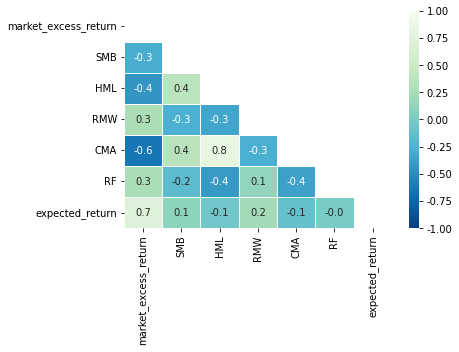

In [192]:
FF.preconditional_test()

                               OLS Regression Results                              
Dep. Variable:     portfolio_excess_return   R-squared:                       0.218
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     1.002
Date:                     Sat, 04 Mar 2023   Prob (F-statistic):              0.445
Time:                             02:23:33   Log-Likelihood:                 20.877
No. Observations:                       24   AIC:                            -29.75
Df Residuals:                           18   BIC:                            -22.69
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


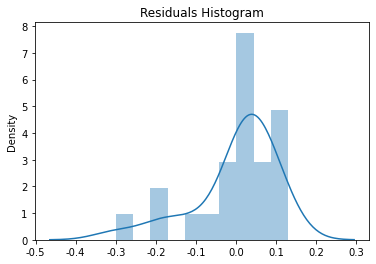

In [193]:
FF.linearRegression(linearRegFormula = "portfolio_excess_return ~ market_excess_return + SMB + HML + RMW + CMA")
  # 일반적으로 1.5 ~ 2.5사이 값이면 자기상관관계가 없어 독립이라고 판단함

                               OLS Regression Results                              
Dep. Variable:     portfolio_excess_return   R-squared:                       0.215
Model:                                 OLS   Adj. R-squared:                  0.050
Method:                      Least Squares   F-statistic:                     1.300
Date:                     Sat, 04 Mar 2023   Prob (F-statistic):              0.306
Time:                             02:27:22   Log-Likelihood:                 20.834
No. Observations:                       24   AIC:                            -31.67
Df Residuals:                           19   BIC:                            -25.78
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


회귀식 잔차의 DW-통계량은 0.4395이다


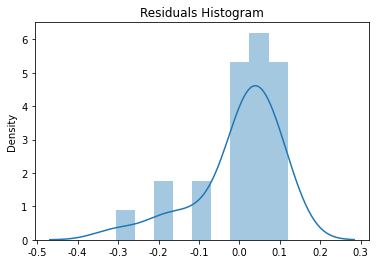

In [194]:
FF.linearRegression(linearRegFormula = "portfolio_excess_return ~ market_excess_return + SMB + HML + RMW")